<a href="https://colab.research.google.com/github/TomasManuelObregon/Python/blob/Labo2/labo2_clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importo y defino cosas.

In [133]:
# Importo las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Defino una funcion para leer los datos
def medicion(data):
  datos = np.loadtxt(data, skiprows=1, delimiter=';')

  distancia     = datos[:,0]
  amplitud      = datos[:,1]
  err_amplitud  = datos[:,2]

  distancia_ln    = np.log(distancia)
  amplitud_ln     = np.log(amplitud)
  err_amplitud_ln = abs(np.log(err_amplitud))

  return distancia, amplitud, err_amplitud, distancia_ln, amplitud_ln, err_amplitud_ln

# Leo los datos
dist_max, amp_max, err_amp_max, dist_max_ln, amp_max_ln, err_amp_max_ln = medicion('amp_max_dist.csv')
dist_min, amp_min, err_amp_min, dist_min_ln, amp_min_ln, err_amp_min_ln = medicion('amp_min_dist.csv')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Como el error de distancia es igual para todos lo difino aca
err_dist    = 0.05 # mm

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Defino una funcion y los datos para poder hacer los ajustes

def lin(x,m, b):
  y = m*x + b  
  return y

# Ajuste para el loglog de los max
popt, _ = op.curve_fit(lin, dist_max_ln, amp_max_ln, sigma=err_amp_max_ln, absolute_sigma = True)
pend_max_ln = popt[0]
ord_max_ln  = popt[1]

dom_max = np.linspace(min(dist_max_ln), max(dist_max_ln), 1000)
im_max  = lin(dom_max, pend_max_ln, ord_max_ln)      

# Ajuste para el loglog de los min
popt, _ = op.curve_fit(lin, dist_min_ln, amp_min_ln, sigma=err_amp_min_ln, absolute_sigma = True)
pend_min_ln = popt[0]
ord_min_ln  = popt[1]

dom_min = np.linspace(min(dist_min_ln), max(dist_min_ln), 1000)
im_min  = lin(dom_min, pend_min_ln, ord_min_ln)


### Grafico Datos y Ajustes

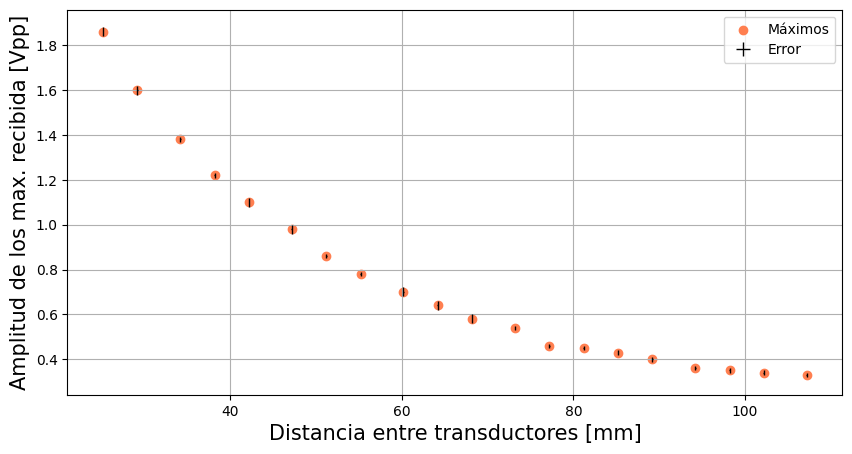

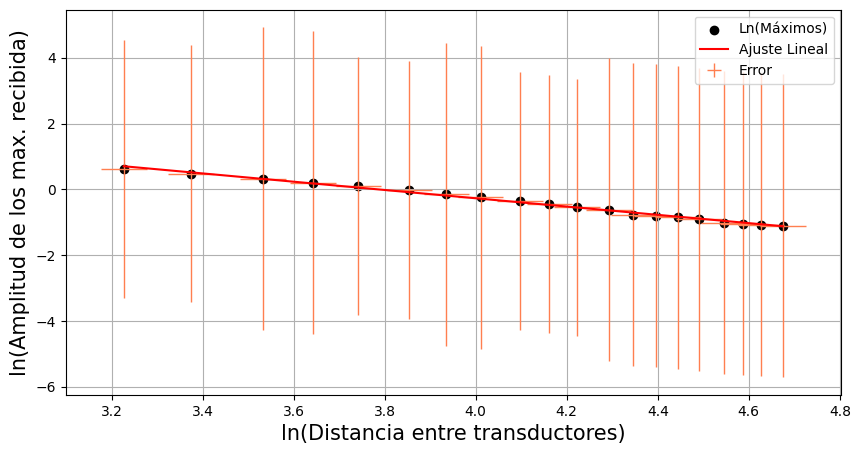

In [134]:
plt.figure(figsize=[10,5])

plt.scatter(dist_max, amp_max, c='#FF7F50', marker='o', label='Máximos')
plt.errorbar(dist_max, amp_max, xerr = err_dist, yerr= err_amp_max, linewidth= 0, elinewidth= 1, c='black', label= 'Error')

plt.xlabel('Distancia entre transductores [mm]', fontsize=15)
plt.ylabel('Amplitud de los max. recibida [Vpp]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

plt.figure(figsize=[10,5])

plt.scatter(dist_max_ln, amp_max_ln, c='black', marker='o', label='Ln(Máximos)')
plt.errorbar(dist_max_ln, amp_max_ln, xerr = err_dist, yerr= err_amp_max_ln, linewidth= 0, elinewidth= 1, c='#FF7F50', label= 'Error')
plt.plot(dom_max, im_max, c='red', label='Ajuste Lineal')

plt.xlabel('ln(Distancia entre transductores)', fontsize=15)
plt.ylabel('ln(Amplitud de los max. recibida)', fontsize=15)
plt.legend()
plt.grid()
plt.show()


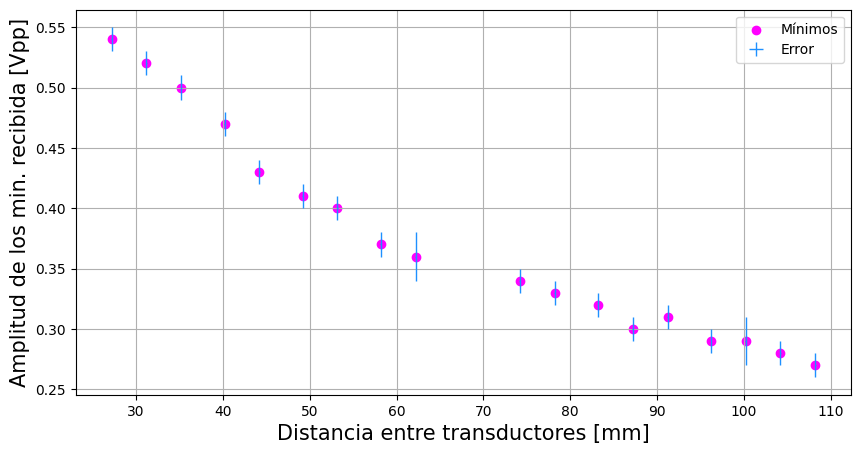

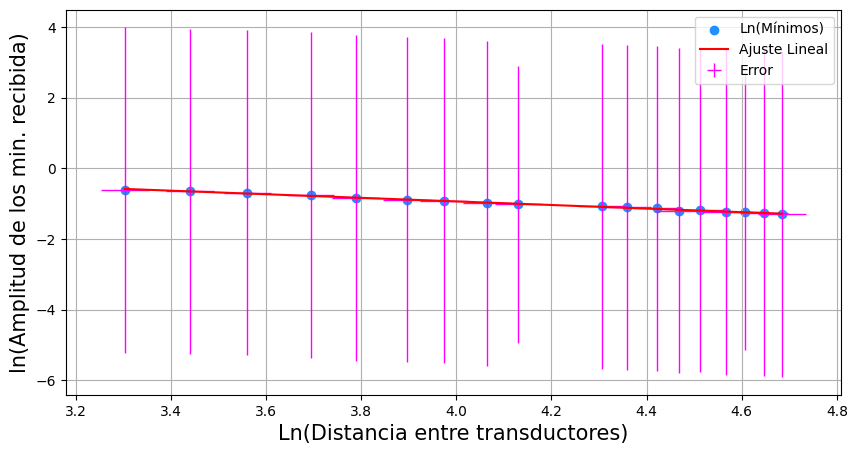

In [135]:
plt.figure(figsize=[10,5])

plt.scatter(dist_min, amp_min, c='#FF00FF', marker='o', label='Mínimos')
plt.errorbar(dist_min, amp_min, xerr = err_dist, yerr= err_amp_min, linewidth= 0, elinewidth= 1, c='#1E90FF', label= 'Error')

plt.xlabel('Distancia entre transductores [mm]', fontsize=15)
plt.ylabel('Amplitud de los min. recibida [Vpp]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

plt.figure(figsize=[10,5])

plt.scatter(dist_min_ln, amp_min_ln, c='#1E90FF', marker='o', label='Ln(Mínimos)')
plt.errorbar(dist_min_ln, amp_min_ln, xerr = err_dist, yerr= err_amp_min_ln, linewidth= 0, elinewidth= 1, c='#FF00FF', label= 'Error')
plt.plot(dom_min, im_min, c='red', label='Ajuste Lineal')

plt.xlabel('Ln(Distancia entre transductores)', fontsize=15)
plt.ylabel('ln(Amplitud de los min. recibida)', fontsize=15)
plt.legend()
plt.grid()
plt.show()


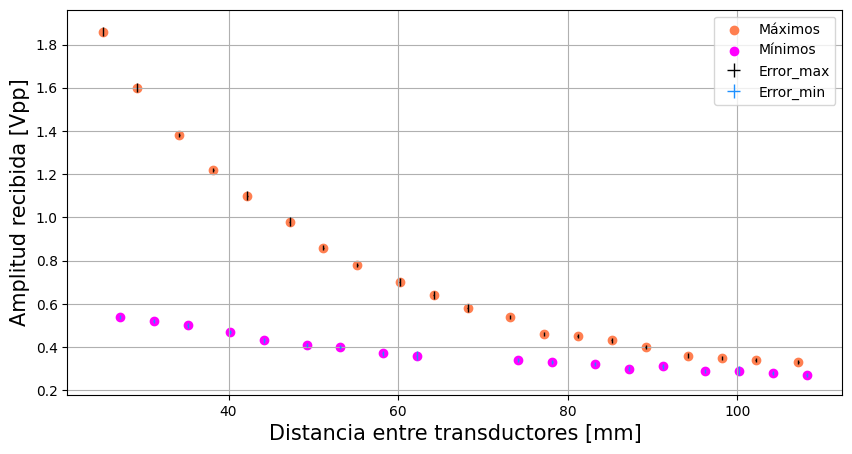

In [136]:
plt.figure(figsize=[10,5])

plt.scatter(dist_max, amp_max, c='#FF7F50', marker='o', label='Máximos')
plt.errorbar(dist_max, amp_max, xerr = err_dist, yerr= err_amp_max, linewidth= 0, elinewidth= 1, c='black', label= 'Error_max')

plt.scatter(dist_min, amp_min, c='#FF00FF', marker='o', label='Mínimos')
plt.errorbar(dist_min, amp_min, xerr = err_dist, yerr= err_amp_min, linewidth= 0, elinewidth= 1, c='#1E90FF', label= 'Error_min')

plt.xlabel('Distancia entre transductores [mm]', fontsize=15)
plt.ylabel('Amplitud recibida [Vpp]', fontsize=15)
plt.legend()
plt.grid()
plt.show()


### Analisis de datos

In [142]:
print(f'La pendiente del LogLog de los máximos es: {np.round(abs(pend_max_ln), decimals=2)} \nLa pendiente del LogLog de los mínimos es: {np.round(abs(pend_min_ln), decimals=2)}')
print(f'\nEl promedio de las pendientes sería: {np.round((abs(pend_max_ln)+abs(pend_min_ln))/2, decimals=2)}')

La pendiente del LogLog de los máximos es: 1.26 
La pendiente del LogLog de los mínimos es: 0.51

El promedio de las pendientes sería: 0.88
